In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## SVM

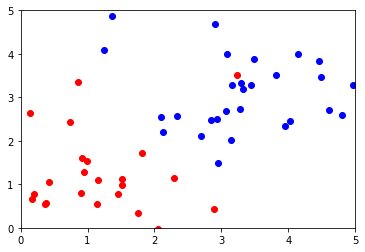

In [36]:
train_x_0 = np.random.randn(30, 2) + np.array([1, 1])  # 평균 1, 1
train_y_0 = np.array([0] * 30)

train_x_1 = np.random.randn(30, 2) + np.array([3, 3])  # 평균 3, 3
train_y_1 = np.array([1] * 30)

test_x = np.random.randn(30, 2) + np.array([2, 2])  # 평균 2, 2

for i in range(30):
    plt.scatter(train_x_0[i][0], train_x_0[i][1], color='red')
    plt.scatter(train_x_1[i][0], train_x_1[i][1], color='blue')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.show()

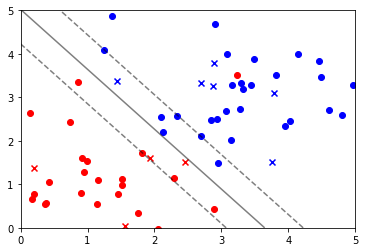

In [39]:
from sklearn.svm import SVC

train_x = np.append(train_x_0, train_x_1, axis=0)
train_y = np.append(train_y_0, train_y_1)

svm = SVC(kernel='linear', C=2)
svm.fit(train_x, train_y)

plt.xlim(0, 5)
plt.ylim(0, 5)

for i in range(30):
    plt.scatter(train_x_0[i][0], train_x_0[i][1], color='red')
    plt.scatter(train_x_1[i][0], train_x_1[i][1], color='blue')
    
xx = np.linspace(0, 5, 21)  # [0, 0.25 ... , 4.75, 5]
yy = np.linspace(0, 5, 21)  # [0, 0.25 ... , 4.75, 5]
YY, XX = np.meshgrid(yy, xx)  # plt.contour 와 같이 사용, 둘이 같이 사용하여 grid 형태의 xx, yy의 쌍을 만들어 줌.
xy = np.vstack([XX.ravel(), YY.ravel()]).T  # XX.ravel == X.reshape(-1), np.vstack로 차원 변환 시켜, 스택을 만들어 줌.
Z = svm.decision_function(xy).reshape(XX.shape)  # decision_function을 이용 해서 값 추출 후 원래 모양으로 reshape.

test_y = svm.predict(test_x)

for i in range(10):
    if test_y[i] == 0:
        plt.scatter(test_x[i][0], test_x[i][1], color='red', marker='x')
    else:
        plt.scatter(test_x[i][0], test_x[i][1], color='blue', marker='x')

plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])  # 경계선 그림

plt.show()

## K-NN

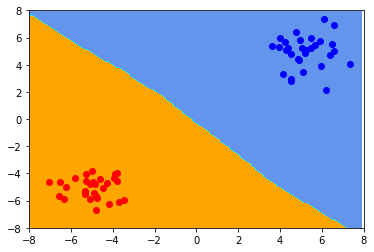

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

train_x_0 = np.random.randn(30, 2) + np.array([-5, -5])  # 평균 5, 5
train_y_0 = np.array([0] * 30)

train_x_1 = np.random.randn(30, 2) + np.array([5, 5])  # 평균 -5, -5
train_y_1 = np.array([1] * 30)

train_x = np.append(train_x_0, train_x_1, axis=0)
train_y = np.append(train_y_0, train_y_1)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_x, train_y)

xx, yy = np.meshgrid(np.arange(-8, 8, .1), np.arange(-8, 8, .1))
Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])  # np.c_ 위아래로 행렬 붙

# Put the result into a color plot
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_light)

for i in range(30):
    plt.scatter(train_x_0[i][0], train_x_0[i][1], color='red')
    plt.scatter(train_x_1[i][0], train_x_1[i][1], color='blue')

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [46]:
neigh.predict([[0, 0]])

array([1])

## Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

wine = load_wine()  # X가 13개의 feature, 시각화 어려움
X = wine.data
Y = wine.target

print(X.shape, Y.shape)

(178, 13) (178,)


In [128]:
X = X
Y = Y

X_train, X_test = X[:-30], X[-30:]
Y_train, Y_test = Y[:-30], Y[-30:]

forest = RandomForestClassifier(n_estimators=100, random_state=0) # n_estimators: 사용할 tree
forest.fit(X_train, Y_train)

accuracy = (sum(forest.predict(X_test) == Y_test) / 30) * 100

print(f"정확도: {accuracy}")

정확도: 96.66666666666667


In [129]:
forest.feature_importances_

array([0.16453422, 0.03106235, 0.01829371, 0.03240328, 0.04474084,
       0.04180306, 0.13492073, 0.01458841, 0.05394241, 0.16223051,
       0.04170749, 0.0540259 , 0.2057471 ])